# One-dimensional distribution

The coupling spline approach does not work one-dimensional distributions. However, one can apply a simple workaround: augment the one-dimensional distribution with an arbitrary independent random dummy variable. A good choice is to draw the second variable from the latent distribution, so that the bijector just has to learn the identity mapping for the augmented variable.

We employ this technique here to learn a bi-modal distribution.

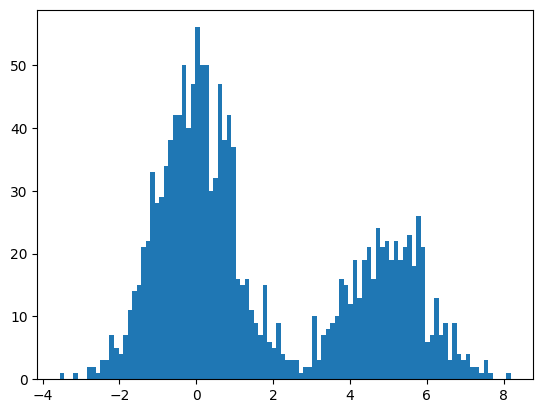

In [14]:
from zenflow import Flow, train
from zenflow import bijectors as bij
from zenflow import distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

rng = np.random.default_rng(1)

x = np.append(rng.normal(size=1000), rng.normal(size=500) + 5)

plt.hist(x, bins=100);

To transform 1D distribution, we augment the second dimension with a toy variable. We draw it from the uniform distribution.

  0%|          | 0/1000 [00:00<?, ?it/s]

2.213604211807251


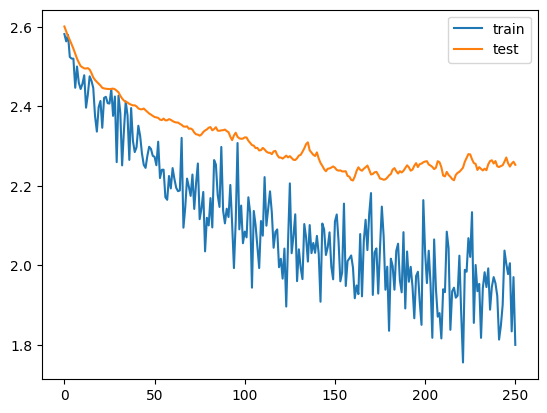

In [15]:
flow = Flow(bij.rolling_spline_coupling(2), latent=dist.Uniform())

rng = np.random.default_rng(1)
X = np.column_stack((x, rng.uniform(size=len(x))))

X_train, X_test = train_test_split(X, random_state=1)

vars, best_epoch, loss_train, loss_test = train(flow, X_train, X_test)
print(loss_test[best_epoch])

plt.plot(loss_train, label="train")
plt.plot(loss_test, label="test")
plt.legend();

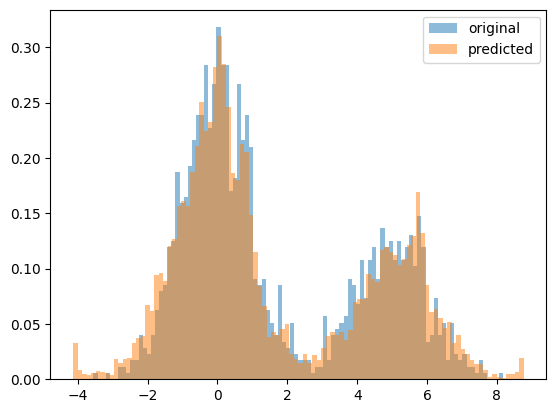

In [16]:
xp = flow.apply(vars, 10000, method="sample")[..., 0]
plt.hist(x, bins=100, density=True, alpha=0.5, label="original")
plt.hist(xp, bins=100, density=True, alpha=0.5, label="predicted")
plt.legend();

The result looks very good.